<a href="https://colab.research.google.com/github/PRASANNA-416/PRASANNA-416/blob/main/Drowsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

MADE  P M SHALINI , NO PLAGIRISM 

In [4]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [5]:
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/ML/Driver_safety-master/Driver_safety-master/eyes/Train'
# valid_path = '/content/gdrive/MyDrive/ML/Driver_safety-master/Driver_safety-master/eyes/OpenFace'

In [6]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [7]:
for layer in mobilnet.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/gdrive/MyDrive/ML/Driver_safety-master/Driver_safety-master/eyes/Train/*')
folders

['/content/gdrive/MyDrive/ML/Driver_safety-master/Driver_safety-master/eyes/Train/ClosedFace',
 '/content/gdrive/MyDrive/ML/Driver_safety-master/Driver_safety-master/eyes/Train/OpenFace']

In [9]:
x = Flatten()(mobilnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [18]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 56, 56, 32)        4128      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 28, 28, 32)      

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/ML/Driver_safety-master/Driver_safety-master/eyes/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2433 images belonging to 2 classes.


In [22]:
training_set

In [23]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  epochs=50,
  steps_per_epoch=len(training_set),
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
77/77 [==============================] - 419s 5s/step - loss: 0.6837 - accuracy: 0.5475
Epoch 2/50
77/77 [==============================] - 28s 367ms/step - loss: 0.6402 - accuracy: 0.6358
Epoch 3/50
77/77 [==============================] - 28s 363ms/step - loss: 0.6292 - accuracy: 0.6502
Epoch 4/50
77/77 [==============================] - 28s 363ms/step - loss: 0.5985 - accuracy: 0.6745
Epoch 5/50
77/77 [==============================] - 28s 363ms/step - loss: 0.5246 - accuracy: 0.7497
Epoch 6/50
77/77 [==============================] - 28s 363ms/step - loss: 0.4730 - accuracy: 0.7748
Epoch 7/50
77/77 [==============================] - 28s 365ms/step - loss: 0.4007 - accuracy: 0.8229
Epoch 8/50
77/77 [==============================] - 28s 368ms/step - loss: 0.4192 - accuracy: 0.8167
Epoch 9/50
77/77 [==============================] - 28s 367ms/step - loss: 0.3525 - accuracy: 0.8500
Epoch 10/50
77/77 [==============================] - 28s 362ms/step - loss: 0.2910 - accuracy

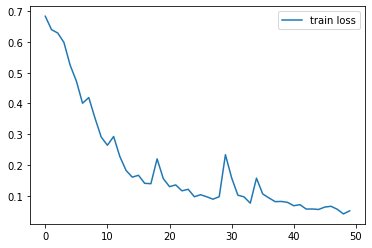

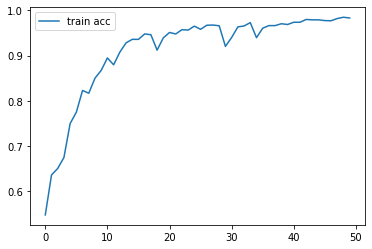

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [26]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)